In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
import os
import cv2

In [13]:
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

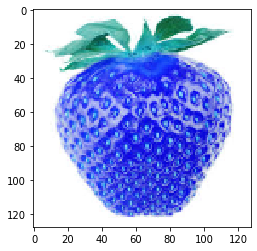

In [14]:
DIR = os.getcwd() + "\\images\\organic"
CATEGORIES = [c for c in os.listdir(DIR)]

for CAT in CATEGORIES:
    PATH = os.path.join(DIR, CAT)
    for img in os.listdir(PATH):
        img_arr = cv2.imread(os.path.join(PATH, img))
        img_arr = cv2.resize(img_arr, (128, 128))
        img_arr = image.img_to_array(img_arr)
        img_arr = img_arr / 255
        plt.imshow(img_arr, cmap="gray")
        plt.show()
        break
    break

In [15]:
X, y = [], []

for CAT in CATEGORIES:
    PATH = os.path.join(DIR, CAT)
    label = CATEGORIES.index(CAT)
    for i, img in enumerate(os.listdir(PATH)):
        if i % 2 == 0: continue
        img_arr = cv2.imread(os.path.join(PATH, img))
        img_arr = cv2.resize(img_arr, (128, 128))
        img_arr = image.img_to_array(img_arr)
        img_arr = img_arr / 255.0
        X.append(img_arr)
        y.append(label)

In [5]:
X = np.array(X)
y = to_categorical(y)

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

aug = image.ImageDataGenerator(
            rotation_range = 20,
            zoom_range=0.15,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.15,
            horizontal_flip=True,
            fill_mode="nearest")

In [7]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
import tensorflow.keras.layers as ly

In [8]:
model = Sequential()
model.add(ly.Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(ly.Activation("relu"))
model.add(ly.MaxPooling2D((2, 2)))
model.add(ly.Conv2D(64, (3, 3)))
model.add(ly.Activation("relu"))
model.add(ly.MaxPooling2D((2, 2)))
model.add(ly.Flatten())
model.add(ly.Dense(64, activation="relu"))
model.add(ly.Dense(len(CATEGORIES), activation="softmax"))

In [10]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0

In [11]:
BATCH_SIZE = 20

model.fit(aug.flow(train_x, train_y, batch_size=BATCH_SIZE),
         steps_per_epoch=len(train_x) // BATCH_SIZE,
         validation_data=(test_x, test_y),
         validation_steps=len(test_x) // BATCH_SIZE,
         epochs=20)

Epoch 1/20


InvalidArgumentError:  Input to reshape is a tensor with 1152000 values, but the requested shape requires a multiple of 186624
	 [[node sequential/flatten/Reshape (defined at <ipython-input-11-e9dcf22d217c>:7) ]] [Op:__inference_train_function_874]

Function call stack:
train_function


In [14]:
# model.fit(aug.flow(train_x, train_y, batch_size=BATCH_SIZE),
#          steps_per_epoch=len(train_x) // BATCH_SIZE,
#          validation_data=(test_x, test_y),
#          validation_steps=len(test_x) // BATCH_SIZE,
#          epochs=60)

In [15]:
# loss, acc = model.evaluate(test_x, test_y,verbose=1)